#### Forecast Demand whit ARIMA Model

In [1]:
# Importing Basic libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing time series specific libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import levene
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace import sarimax
import prophet
from prophet import Prophet# Importing Basic libraries 


# Miscellaneous libararies
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from random import random

# Libaraies for evaluation of model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.arima.model import ARIMAResults

# Importing time series specific libraries
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller
from scipy.stats import bartlett
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA
import pmdarima
from pmdarima import auto_arima
from statsmodels.tsa.statespace import sarimax
import prophet
from prophet import Prophet
from scipy.stats import levene
# Miscellaneous libararies
import warnings
warnings.filterwarnings('ignore')
from math import sqrt
from random import random

# Libaraies for evaluation of model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from statsmodels.tsa.arima.model import ARIMAResults


c:\Users\milla\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
 #?  Function for solver data import
def import_data(x):
    """Import the data from a file into the Excel document"""
    global df 
    route_script = os.getcwd()
# Excel name :
    name_doc = x
#Combine script route and name_doc
    route_doc=os.path.join(route_script,name_doc)
#Load data in a Data Frame to panda 
    df=pd.read_excel(route_doc)
    return df

In [3]:
 #?Call the function for data analysis 
import_data("load_IJV.xlsx")

,idprov,fecha,dem1,dem2,dem3,dem4,dem5,dem6,dem7,dem8,...,dem16,dem17,dem18,dem19,dem20,dem21,dem22,dem23,dem24,dem25
0,IJV,2007-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IJV,2007-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IJV,2007-07-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IJV,2007-07-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IJV,2007-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3915,IJV,2018-04-14,15.0,14.0,13.0,13.0,13.0,13.0,13.0,12.0,...,12.0,12.0,13.0,14.0,15.0,16.0,16.0,16.0,15.0,16.0
3916,IJV,2018-04-15,15.0,14.0,14.0,13.0,13.0,13.0,12.0,12.0,...,12.0,12.0,13.0,14.0,15.0,15.0,16.0,16.0,15.0,16.0
3917,IJV,2018-04-16,14.0,13.0,13.0,13.0,12.0,13.0,12.0,12.0,...,12.0,12.0,12.0,12.0,14.0,14.0,14.0,13.0,12.0,14.0
3918,IJV,2018-04-17,11.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,...,11.0,11.0,12.0,13.0,14.0,14.0,14.0,13.0,12.0,14.0


In [4]:
 #? shaping the data, only the last 10 years (2008 - 2017)
df = df[df["fecha"] >= '2008-01-01']
df = df[df["fecha"] <= '2017-12-31']
print(df.head())

    idprov      fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  dem8  ...  \
159    IJV 2008-01-01   9.0   9.0   8.0   8.0   8.0   9.0   9.0  10.0  ...   
160    IJV 2008-01-02   8.0   6.0   8.0   7.0   8.0   8.0   8.0  10.0  ...   
161    IJV 2008-01-03   6.0   4.0   5.0   6.0   6.0   5.0  10.0  10.0  ...   
162    IJV 2008-01-04   6.0   6.0   7.0   6.0   6.0   8.0  10.0  11.0  ...   
163    IJV 2008-01-05   6.0   6.0   6.0   6.0   6.0   8.0   9.0  10.0  ...   

     dem16  dem17  dem18  dem19  dem20  dem21  dem22  dem23  dem24  dem25  
159   11.0   12.0   14.0   15.0   12.0   11.0   11.0   10.0   10.0   16.0  
160   12.0   15.0   17.0   16.0   11.0    9.0    8.0    7.0    6.0   17.0  
161   11.0   15.0   18.0   17.0   12.0   10.0    9.0    7.0    7.0   19.0  
162   12.0   14.0   18.0   19.0   13.0   10.0    9.0    7.0    7.0   19.0  
163   12.0   11.0   18.0   19.0   14.0   11.0   10.0    8.0    8.0   20.0  

[5 rows x 27 columns]


In [5]:
 #? removing last column
infoToUse = df.drop(columns="dem25")
infoToUse = infoToUse.drop(columns="idprov")
print(infoToUse.head())

         fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  dem8  dem9  ...  \
159 2008-01-01   9.0   9.0   8.0   8.0   8.0   9.0   9.0  10.0  11.0  ...   
160 2008-01-02   8.0   6.0   8.0   7.0   8.0   8.0   8.0  10.0  11.0  ...   
161 2008-01-03   6.0   4.0   5.0   6.0   6.0   5.0  10.0  10.0  10.0  ...   
162 2008-01-04   6.0   6.0   7.0   6.0   6.0   8.0  10.0  11.0  11.0  ...   
163 2008-01-05   6.0   6.0   6.0   6.0   6.0   8.0   9.0  10.0  12.0  ...   

     dem15  dem16  dem17  dem18  dem19  dem20  dem21  dem22  dem23  dem24  
159   11.0   11.0   12.0   14.0   15.0   12.0   11.0   11.0   10.0   10.0  
160    8.0   12.0   15.0   17.0   16.0   11.0    9.0    8.0    7.0    6.0  
161   11.0   11.0   15.0   18.0   17.0   12.0   10.0    9.0    7.0    7.0  
162   11.0   12.0   14.0   18.0   19.0   13.0   10.0    9.0    7.0    7.0  
163   11.0   12.0   11.0   18.0   19.0   14.0   11.0   10.0    8.0    8.0  

[5 rows x 25 columns]


In [6]:
 #? restarting the index
infoToUse.index = np.arange(1, len(infoToUse) + 1, 1)
print(infoToUse.head())

       fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  dem8  dem9  ...  \
1 2008-01-01   9.0   9.0   8.0   8.0   8.0   9.0   9.0  10.0  11.0  ...   
2 2008-01-02   8.0   6.0   8.0   7.0   8.0   8.0   8.0  10.0  11.0  ...   
3 2008-01-03   6.0   4.0   5.0   6.0   6.0   5.0  10.0  10.0  10.0  ...   
4 2008-01-04   6.0   6.0   7.0   6.0   6.0   8.0  10.0  11.0  11.0  ...   
5 2008-01-05   6.0   6.0   6.0   6.0   6.0   8.0   9.0  10.0  12.0  ...   

   dem15  dem16  dem17  dem18  dem19  dem20  dem21  dem22  dem23  dem24  
1   11.0   11.0   12.0   14.0   15.0   12.0   11.0   11.0   10.0   10.0  
2    8.0   12.0   15.0   17.0   16.0   11.0    9.0    8.0    7.0    6.0  
3   11.0   11.0   15.0   18.0   17.0   12.0   10.0    9.0    7.0    7.0  
4   11.0   12.0   14.0   18.0   19.0   13.0   10.0    9.0    7.0    7.0  
5   11.0   12.0   11.0   18.0   19.0   14.0   11.0   10.0    8.0    8.0  

[5 rows x 25 columns]


In [7]:
 #? removing February 29
print("lengthBefore =", len(infoToUse)) # checking
idx_1 = infoToUse[infoToUse["fecha"] == '2008-02-29']
idx_2 = infoToUse[infoToUse["fecha"] == '2012-02-29']
idx_3 = infoToUse[infoToUse["fecha"] == '2016-02-29']
toRemove = [idx_1.index.item(), idx_2.index.item(), idx_3.index.item()]
print(toRemove)
infoToUse = infoToUse.drop(toRemove)
print("lengthAfter =", len(infoToUse)) # checking

lengthBefore = 3653
[60, 1521, 2982]
lengthAfter = 3650


In [8]:
 #? filtering data needed
infoToUseFiltered = infoToUse[infoToUse['fecha'].dt.strftime('%m-%d') == '01-01']
print(infoToUseFiltered)

          fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  dem8  dem9  ...  \
1    2008-01-01   9.0   9.0   8.0   8.0   8.0   9.0   9.0  10.0  11.0  ...   
367  2009-01-01   8.0   8.0   8.0   7.0   7.0   7.0   7.0   8.0  10.0  ...   
732  2010-01-01   8.0   7.0   7.0   7.0   7.0   7.0   7.0   8.0   9.0  ...   
1097 2011-01-01   7.0   6.0   6.0   6.0   6.0   6.0   6.0   8.0   9.0  ...   
1462 2012-01-01   8.0   7.0   6.0   7.0   7.0   7.0   7.0   8.0   9.0  ...   
1828 2013-01-01   8.0   8.0   8.0   7.0   7.0   7.0   7.0   8.0   9.0  ...   
2193 2014-01-01  11.0  10.0  10.0  10.0   9.0  10.0  10.0  10.0  10.0  ...   
2558 2015-01-01  10.0  10.0   9.0   9.0   9.0   9.0   9.0  10.0  10.0  ...   
2923 2016-01-01  12.0  12.0  11.0  11.0  11.0  11.0  10.0  11.0  12.0  ...   
3289 2017-01-01  10.0  10.0  10.0   9.0   9.0   9.0   9.0  10.0  10.0  ...   

      dem15  dem16  dem17  dem18  dem19  dem20  dem21  dem22  dem23  dem24  
1      11.0   11.0   12.0   14.0   15.0   12.0   11.0   11.0   1

        fecha  dem1  dem2  dem3  dem4  dem5  dem6  dem7  dem8  dem9  ...  \
1  2008-01-01   9.0   9.0   8.0   8.0   8.0   9.0   9.0  10.0  11.0  ...   
2  2009-01-01   8.0   8.0   8.0   7.0   7.0   7.0   7.0   8.0  10.0  ...   
3  2010-01-01   8.0   7.0   7.0   7.0   7.0   7.0   7.0   8.0   9.0  ...   
4  2011-01-01   7.0   6.0   6.0   6.0   6.0   6.0   6.0   8.0   9.0  ...   
5  2012-01-01   8.0   7.0   6.0   7.0   7.0   7.0   7.0   8.0   9.0  ...   
6  2013-01-01   8.0   8.0   8.0   7.0   7.0   7.0   7.0   8.0   9.0  ...   
7  2014-01-01  11.0  10.0  10.0  10.0   9.0  10.0  10.0  10.0  10.0  ...   
8  2015-01-01  10.0  10.0   9.0   9.0   9.0   9.0   9.0  10.0  10.0  ...   
9  2016-01-01  12.0  12.0  11.0  11.0  11.0  11.0  10.0  11.0  12.0  ...   
10 2017-01-01  10.0  10.0  10.0   9.0   9.0   9.0   9.0  10.0  10.0  ...   

    dem15  dem16  dem17  dem18  dem19  dem20  dem21  dem22  dem23  dem24  
1    11.0   11.0   12.0   14.0   15.0   12.0   11.0   11.0   10.0   10.0  
2     9.0   1

9.875

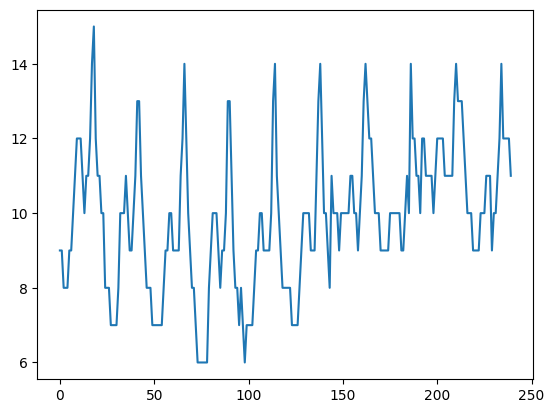

In [9]:
import matplotlib.pyplot as plot
# restaring the index
infoToUseFiltered.index = np.arange(1, len(infoToUseFiltered) + 1, 1)
print(infoToUseFiltered)
# reshape the data
dataToFit = []
for k in range(1, 11):
    print(k)
    data = infoToUseFiltered.loc[k,['dem1', 'dem2', 'dem3', 'dem4', 'dem5', 'dem6', 'dem7', 'dem8', 'dem9', 'dem10', 'dem11', 'dem12', 'dem13', 'dem14', 'dem15', 'dem16', 'dem17', 'dem18', 'dem19', 'dem20', 'dem21', 'dem22', 'dem23', 'dem24']]
    data = np.array(data)    
    dataToFit.append(data)
dataToFit = np.array(dataToFit)
dataToFit = dataToFit.flatten()
dataToFit = np.float64(dataToFit)
plot.plot(dataToFit)
np.sum(dataToFit)
np.mean(dataToFit)

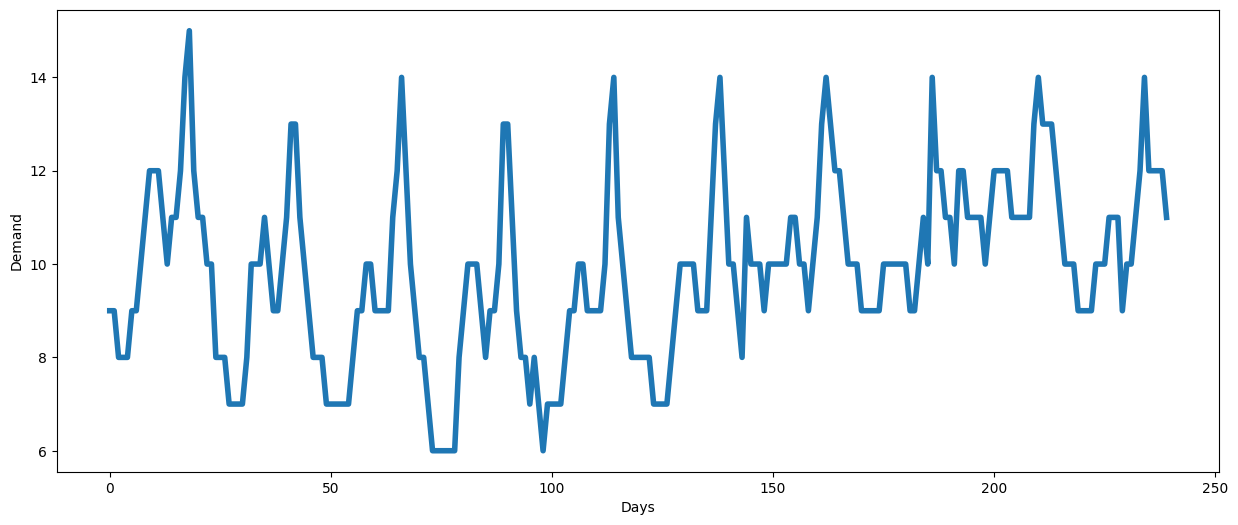

In [10]:
plt.figure(figsize = (15,6))
plt.plot(dataToFit,linewidth = 4)
plt.xlabel('Days')
plt.ylabel('Demand')
plt.show()

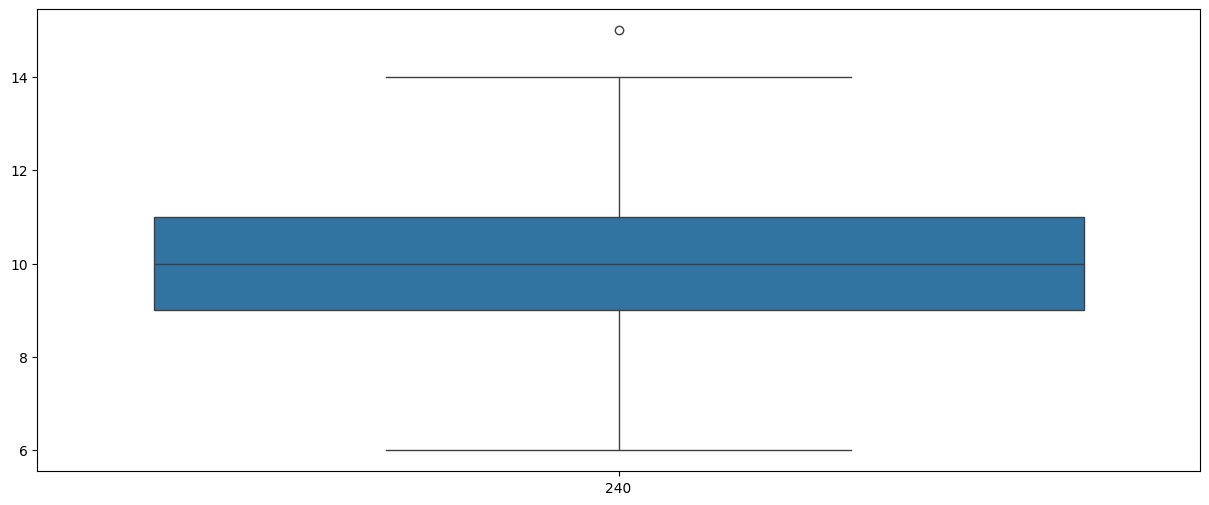

In [37]:
plt.figure(figsize = (15,6))
sns.boxplot(x = len(dataToFit), y = dataToFit)
plt.show()

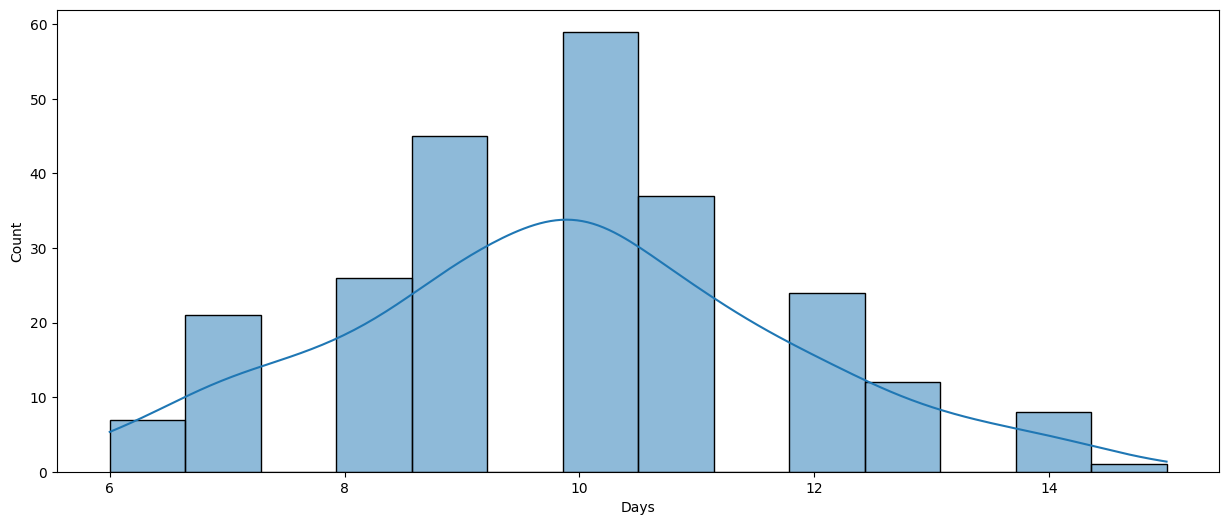

In [11]:
 #? Density Plot
plt.figure(figsize = (15,6))
sns.histplot(dataToFit, kde = True)
plt.xlabel('Days')
plt.ylabel('Count')
plt.show()

<Figure size 1800x800 with 0 Axes>

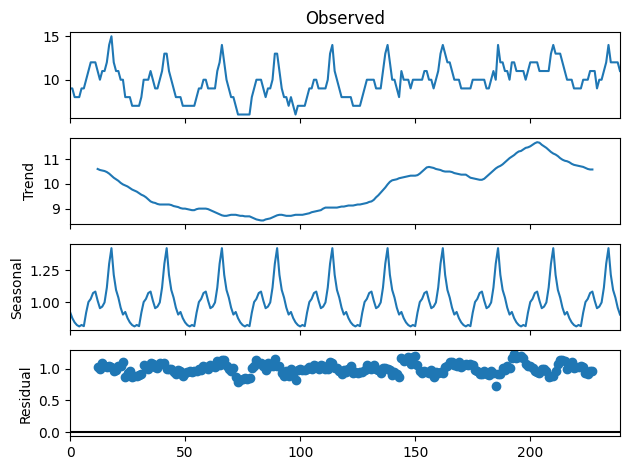

In [19]:
 #? Decomposition  of a array 
decomposition = sm.tsa.seasonal_decompose(dataToFit, model='multiplicative',period=24)
#? Plot data 
plt.figure(figsize=(18,8))
decomposition.plot()
plt.show()

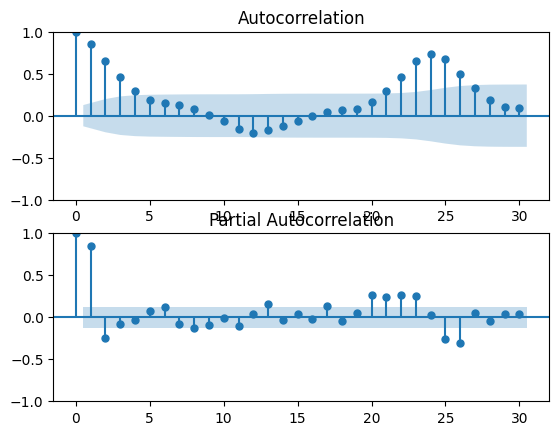

In [20]:
# ACF & PACF Plots
plt.figure()
plt.subplot(211)
plot_acf(dataToFit, ax=plt.gca(), lags = 30)
plt.subplot(212)
plot_pacf(dataToFit, ax=plt.gca(), lags = 30)
plt.show()

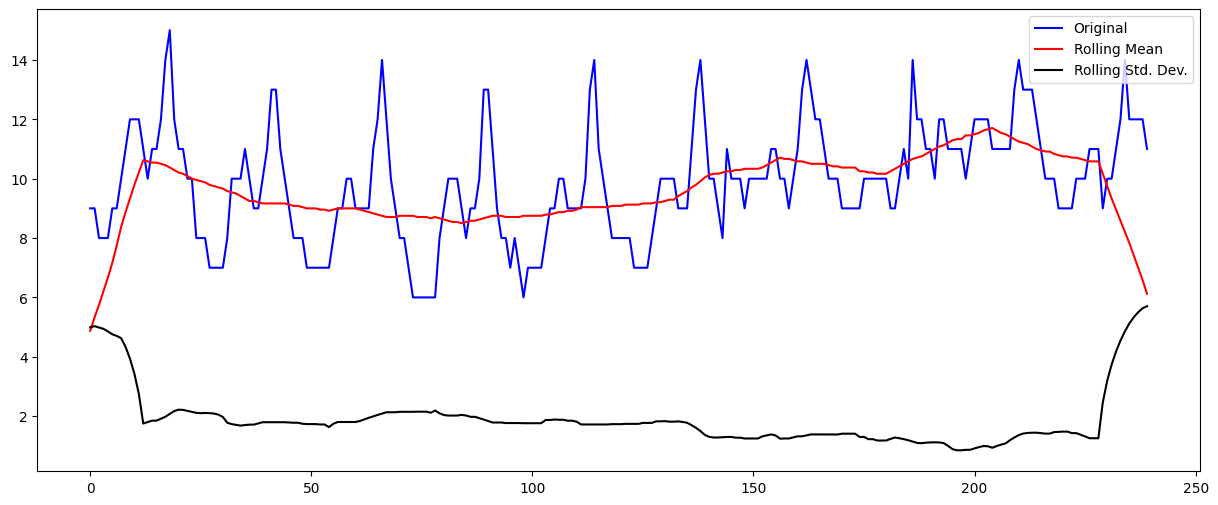

In [21]:

#? Convert the array to a NumPy array
dataToFit_np = np.array(dataToFit)

#? Calculate the rolling mean and standard deviation with a window of 24 hours
rolmean = np.convolve(dataToFit_np, np.ones(24)/24, mode='same')
rolstd = np.sqrt(np.convolve(dataToFit_np**2, np.ones(24)/24, mode='same') - rolmean**2)

# Plot the original data, rolling mean, and rolling standard deviation
plt.figure(figsize=(15,6))
orig = plt.plot(dataToFit_np, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std. Dev.')
plt.legend(loc='best')
plt.show()

In [35]:
def test_stationarity(Array,p):

    # Rolling Mean & Rolling Standard Deviation
    rolmean = np.convolve(dataToFit_np, np.ones(24)/24, mode='same')
    rolstd = np.sqrt(np.convolve(dataToFit_np**2, np.ones(24)/24, mode='same') - rolmean**2)

    plt.figure(figsize = (15,6))
    orig = plt.plot(Array, color = 'blue', label ='Original')
    mean  = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'black', label = 'Rolling Std. Dev.')
    plt.legend(loc = 'best')
    plt.show()

    # # Augmented Dicky-Fuller Test
    print('-------------Results of Dicky Fuller Test -------------')
    dftest = adfuller(Array, autolag = 'AIC')
    dfoutput = pd.Series(data = dftest[0:4], index = ['Test Statistic : adf', 'p-value : MacKinnon\'s approximate p-value',
                                                'No. of Lags used', 'No. of observations used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    dfoutput['Maximized AIC:'] = dftest[5]
    print(dfoutput)
    if dftest[1]>0.05 :
            print("the null hypothesis is fulfilled for no stationary series ")
    else:
        print("the  hypothesis is fulfilled for  stationary series ")

    # #! Agree the Levene test
    # Divide the data into three equal parts
    
    if len(dataToFit)//2==0 :
        part_size = len(dataToFit) // 2
        seg1 = dataToFit[:part_size]
        seg2 = dataToFit[2*part_size:]
            # # Apply the levene test to each pair of segments
        resultado_levene_seg1_seg2 = levene(seg1, seg2)
    # Apply the levene test to each pair of segments
         # # Print the results
        print("Valor p de la prueba de levene para seg1 y seg2:", resultado_levene_seg1_seg2.pvalue)
        if resultado_levene_seg1_seg2.pvalue < 0.05:
            print('La serie no es estacionaria en VARIANZA')
        else:
            print('La serie es estacionaria en VARIANZA')
    else:
    # Adjust the parts size if needed to make them approximately equal
        part_size = len(dataToFit) // 3
        # Divide the series into three parts
        seg1 = dataToFit[:part_size]
        seg2 = dataToFit[part_size:2*part_size]
        seg3 = dataToFit[2*part_size:]
        print(seg3)
        # Apply the levene test to each pair of segments
        resultado_levene_seg1_seg2 = levene(seg1, seg2)
        resultado_levene_seg2_seg3 = levene(seg2, seg3)
        resultado_levene_seg3_seg1 = levene(seg3, seg1)

        # Print the results
        print("Valor p de la prueba de levene para seg1 y seg2:", resultado_levene_seg1_seg2.pvalue)
        print("Valor p de la prueba de levene para seg2 y seg3:", resultado_levene_seg2_seg3.pvalue)
        print("Valor p de la prueba de levene para seg3 y seg1:", resultado_levene_seg3_seg1.pvalue)

        if resultado_levene_seg1_seg2.pvalue < 0.05 and resultado_levene_seg2_seg3.pvalue < 0.05 and resultado_levene_seg3_seg1.pvalue < 0.05:
            print('La serie no es estacionaria en VARIANZA')
        else:
            print('La serie es estacionaria en VARIANZA')

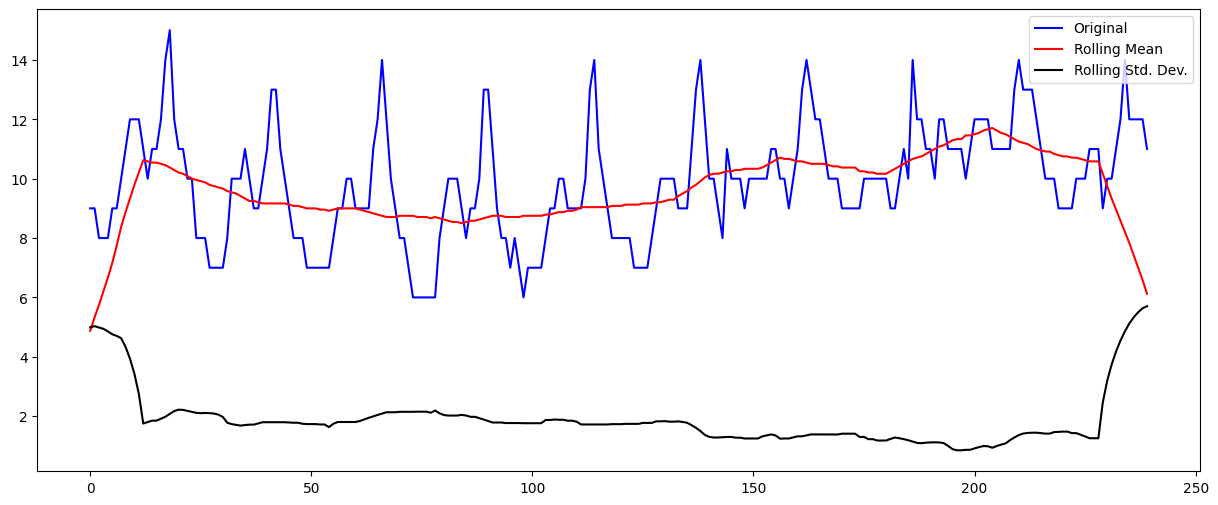

-------------Results of Dicky Fuller Test -------------
Test Statistic : adf                          -3.409709
p-value : MacKinnon's approximate p-value      0.010632
No. of Lags used                              12.000000
No. of observations used                     227.000000
Critical Value (1%)                           -3.459490
Critical Value (5%)                           -2.874358
Critical Value (10%)                          -2.573602
Maximized AIC:                               627.859209
dtype: float64
the  hypothesis is fulfilled for  stationary series 
[11. 13. 14. 13. 12. 12. 11. 10. 10. 10.  9.  9.  9.  9.  9. 10. 10. 10.
 10. 10. 10.  9.  9. 10. 11. 10. 14. 12. 12. 11. 11. 10. 12. 12. 11. 11.
 11. 11. 10. 11. 12. 12. 12. 12. 11. 11. 11. 11. 11. 13. 14. 13. 13. 13.
 12. 11. 10. 10. 10.  9.  9.  9.  9. 10. 10. 10. 11. 11. 11.  9. 10. 10.
 11. 12. 14. 12. 12. 12. 12. 11.]
Valor p de la prueba de levene para seg1 y seg2: 0.04558203103211679
Valor p de la prueba de levene pa

In [36]:
test_stationarity(dataToFit,24)